In [185]:
import pandas as pd
power_series_df = pd.read_csv('../downloads/household_power_consumption.txt', index_col='date', sep=';',
                 na_values=['nan', '?'], infer_datetime_format=True, parse_dates={'date': ['Date', 'Time']}, low_memory=False)

print(power_series_df.shape)
print(power_series_df.describe().to_markdown())

(2075259, 7)
|       |   Global_active_power |   Global_reactive_power |       Voltage |   Global_intensity |   Sub_metering_1 |   Sub_metering_2 |   Sub_metering_3 |
|:------|----------------------:|------------------------:|--------------:|-------------------:|-----------------:|-----------------:|-----------------:|
| count |           2.04928e+06 |             2.04928e+06 |   2.04928e+06 |        2.04928e+06 |      2.04928e+06 |      2.04928e+06 |      2.04928e+06 |
| mean  |           1.09162     |             0.123714    | 240.84        |        4.62776     |      1.12192     |      1.29852     |      6.45845     |
| std   |           1.05729     |             0.112722    |   3.23999     |        4.4444      |      6.15303     |      5.82203     |      8.43715     |
| min   |           0.076       |             0           | 223.2         |        0.2         |      0           |      0           |      0           |
| 25%   |           0.308       |             0.048       | 238

In [186]:
power_series_df.sample(10)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date,,,,,,,
2009-07-24 04:43:00,0.200,0.098,241.04,0.8,0.0,0.0,1.0
2009-04-19 02:41:00,0.302,0.000,245.09,1.2,0.0,0.0,1.0
2010-07-15 17:07:00,0.580,0.258,239.39,2.6,0.0,2.0,1.0
2008-10-14 12:19:00,1.290,0.048,238.71,5.4,0.0,0.0,18.0
2008-01-17 02:32:00,0.420,0.084,244.10,1.8,0.0,0.0,0.0
2010-10-04 00:37:00,0.834,0.068,243.91,3.4,0.0,0.0,0.0
2009-08-05 16:50:00,1.238,0.000,244.15,5.0,0.0,0.0,18.0
2009-04-30 16:39:00,0.556,0.206,244.51,2.6,0.0,1.0,0.0
2007-05-02 12:10:00,0.290,0.226,234.91,1.6,0.0,1.0,0.0


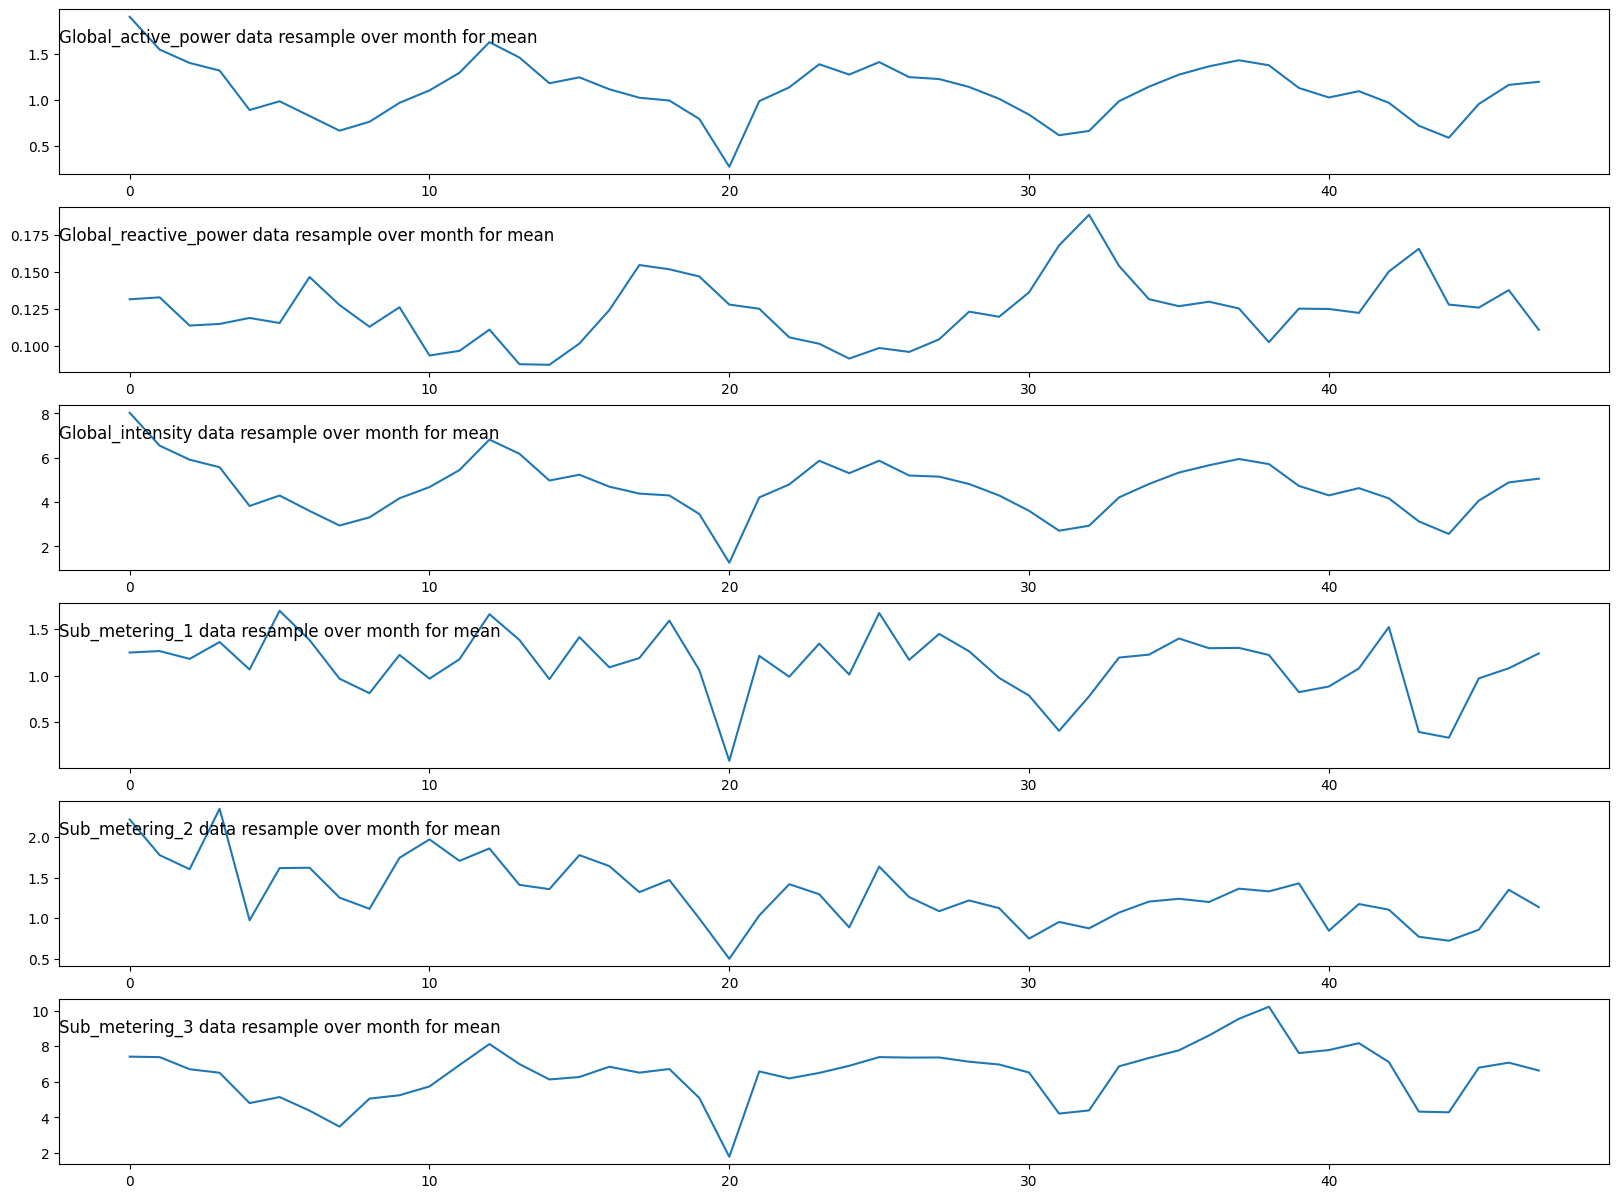

In [187]:
import matplotlib.pyplot as plt

i = 1
cols = [0, 1, 3, 4, 5, 6]
plt.figure(figsize=(20, 15))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(power_series_df.resample('M').mean().values[:, col])
    plt.title(
        power_series_df.columns[col] + ' data resample over month for mean', y=0.75, loc='left')
    i += 1
plt.show()


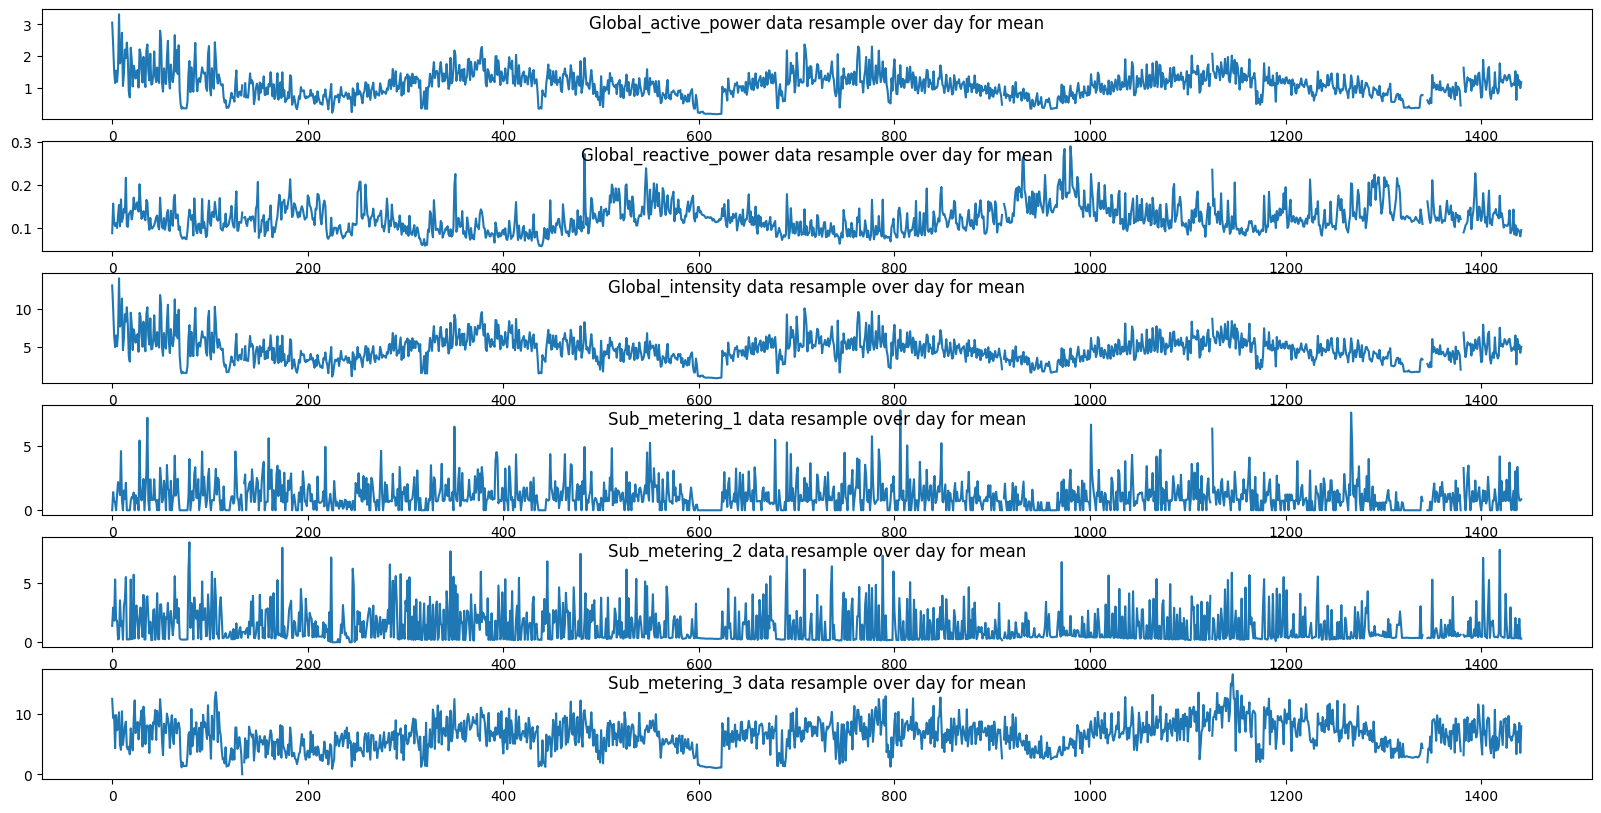

In [188]:
i = 1
cols = [0, 1, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(power_series_df.resample('D').mean().values[:, col])
    plt.title(
        power_series_df.columns[col] + ' data resample over day for mean', y=0.75, loc='center')
    i += 1
plt.show()


In [189]:
def series_aggregation(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg


In [190]:
df_resample = power_series_df.resample('h').mean()
df_resample.shape


(34589, 7)

In [191]:
# Data Preprocessing

from sklearn.preprocessing import MinMaxScaler
import math
values = df_resample.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_aggregation(scaled, 1, 1)
r = list(range(df_resample.shape[1]+1, 2*df_resample.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t)
0,0.545045,0.103358,0.335501,0.541487,0.0,0.144652,0.782676,0.636816
1,0.509006,0.110073,0.283802,0.502152,0.0,0.030869,0.774169,0.545045
2,0.488550,0.096987,0.315987,0.481110,0.0,0.000000,0.778809,0.509006
3,0.455597,0.099010,0.434417,0.449904,0.0,0.008973,0.798917,0.488550
4,0.322555,0.072536,0.495847,0.323529,0.0,0.002872,0.205723,0.455597


In [192]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [193]:
def split_train_test_data(values = reframed.values, split_ratio = 0.8):
    values = torch.tensor(values).float()
    split_length = math.floor(len(values) * split_ratio)
    train,test = values[:split_length],values[split_length:]
    train_x, train_y = train[:, :-1], train[:, -1]
    test_x, test_y = test[:, :-1], test[:, -1]
    train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
    test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))
    print(f'train_x=>{train_x.shape}, test_x=>{test_x.shape}')
    print(f'train_y=>{train_y.shape}, test_y=>{test_y.shape}')
    return train_x, test_x, train_y, test_y

In [194]:
# Data spliting into train and test data series.80:20
train_x, test_x, train_y, test_y = split_train_test_data(values = reframed.values, split_ratio = 0.8)


train_x=>torch.Size([27327, 1, 7]), test_x=>torch.Size([6832, 1, 7])
train_y=>torch.Size([27327]), test_y=>torch.Size([6832])


In [195]:

# Define the model

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.dropout = nn.Dropout(p=0.1)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.dropout(out[:, -1, :])
        out = self.fc(out)
        return out

    def predict(self, x):
        with torch.no_grad():
            y_pred = self.forward(x)
        return y_pred


# Initialize the model
model = LSTMModel(input_size=train_x.shape[2], hidden_size=100, output_size=1)

print(model)


LSTMModel(
  (lstm): LSTM(7, 100, batch_first=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)


In [196]:
def plot_training_graphs(loss_list):
    fig = plt.figure(figsize=(20, 7))
    plot = fig.add_subplot(1, 1, 1)
    plot.set_title("Training vs Validation loss")
    plot.plot(loss_list[:, 0], linestyle='--', label="Training Loss")
    plot.plot(loss_list[:, 1], linestyle='-', label="Validation Loss")
    plot.set_xlabel("Epoch")
    plot.set_ylabel("Loss")
    plot.legend()
    plt.show()

In [197]:
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr= 0.0001)

# no of epochs 
epoch = 200

# Train the model
loss_list = []
for epoch in range(epoch):
    optimizer.zero_grad()
    output = model(train_x)
    train_loss = criterion(output.squeeze(), train_y)
    train_loss.backward()
    optimizer.step()

    # Evaluate the model on the test data every 10 epochs
    with torch.no_grad():
        test_output = model(test_x.float())
        test_loss = criterion(test_output.squeeze(), test_y)
        if epoch % 10 == 0:
            print(
                f"Epoch {epoch + 10}, Train Loss: {train_loss.item():.6f}, Test Loss: {test_loss.item():.6f}")
    loss_list.append([train_loss.item(), test_loss.item()])
  

Epoch 10, Train Loss: 0.036529, Test Loss: 0.025485
Epoch 20, Train Loss: 0.034652, Test Loss: 0.023880
Epoch 30, Train Loss: 0.032892, Test Loss: 0.022399
Epoch 40, Train Loss: 0.031256, Test Loss: 0.021045
Epoch 50, Train Loss: 0.029760, Test Loss: 0.019778
Epoch 60, Train Loss: 0.028352, Test Loss: 0.018630
Epoch 70, Train Loss: 0.027044, Test Loss: 0.017574
Epoch 80, Train Loss: 0.025835, Test Loss: 0.016616
Epoch 90, Train Loss: 0.024715, Test Loss: 0.015774
Epoch 100, Train Loss: 0.023691, Test Loss: 0.014990
Epoch 110, Train Loss: 0.022786, Test Loss: 0.014296
Epoch 120, Train Loss: 0.021934, Test Loss: 0.013708
Epoch 130, Train Loss: 0.021203, Test Loss: 0.013168
Epoch 140, Train Loss: 0.020520, Test Loss: 0.012748
Epoch 150, Train Loss: 0.019919, Test Loss: 0.012376
Epoch 160, Train Loss: 0.019390, Test Loss: 0.012060
Epoch 170, Train Loss: 0.018941, Test Loss: 0.011816
Epoch 180, Train Loss: 0.018539, Test Loss: 0.011625
Epoch 190, Train Loss: 0.018199, Test Loss: 0.011433
Ep

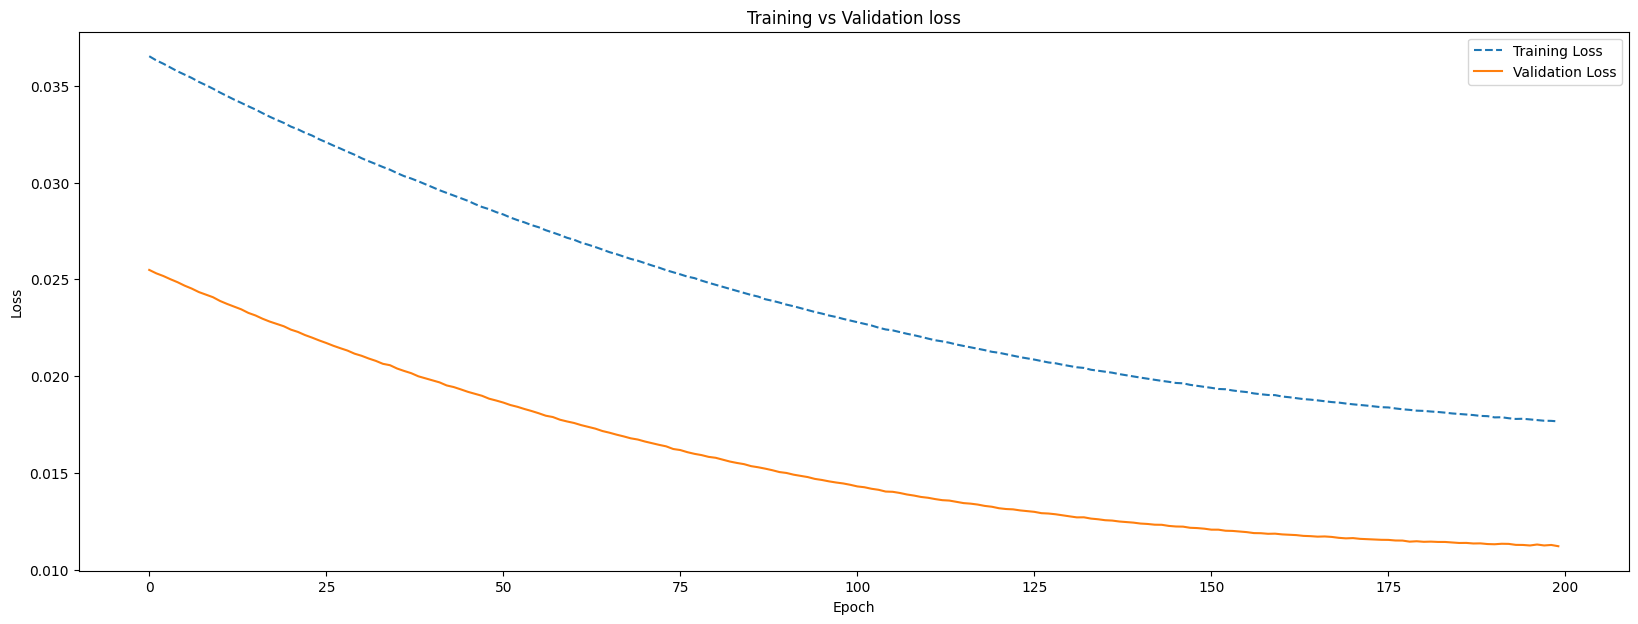

In [198]:

# Plot the loss history
plot_training_graphs(np.array(loss_list))

In [199]:
size = df_resample.shape[1]

# Prediction test
yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

# invert scaling for prediction
test_x = test_x.double().numpy()
test_y = test_y.double().numpy()
inv_yhat = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:, 0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, 0]

# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 0.683


(6832,)
(6832,)


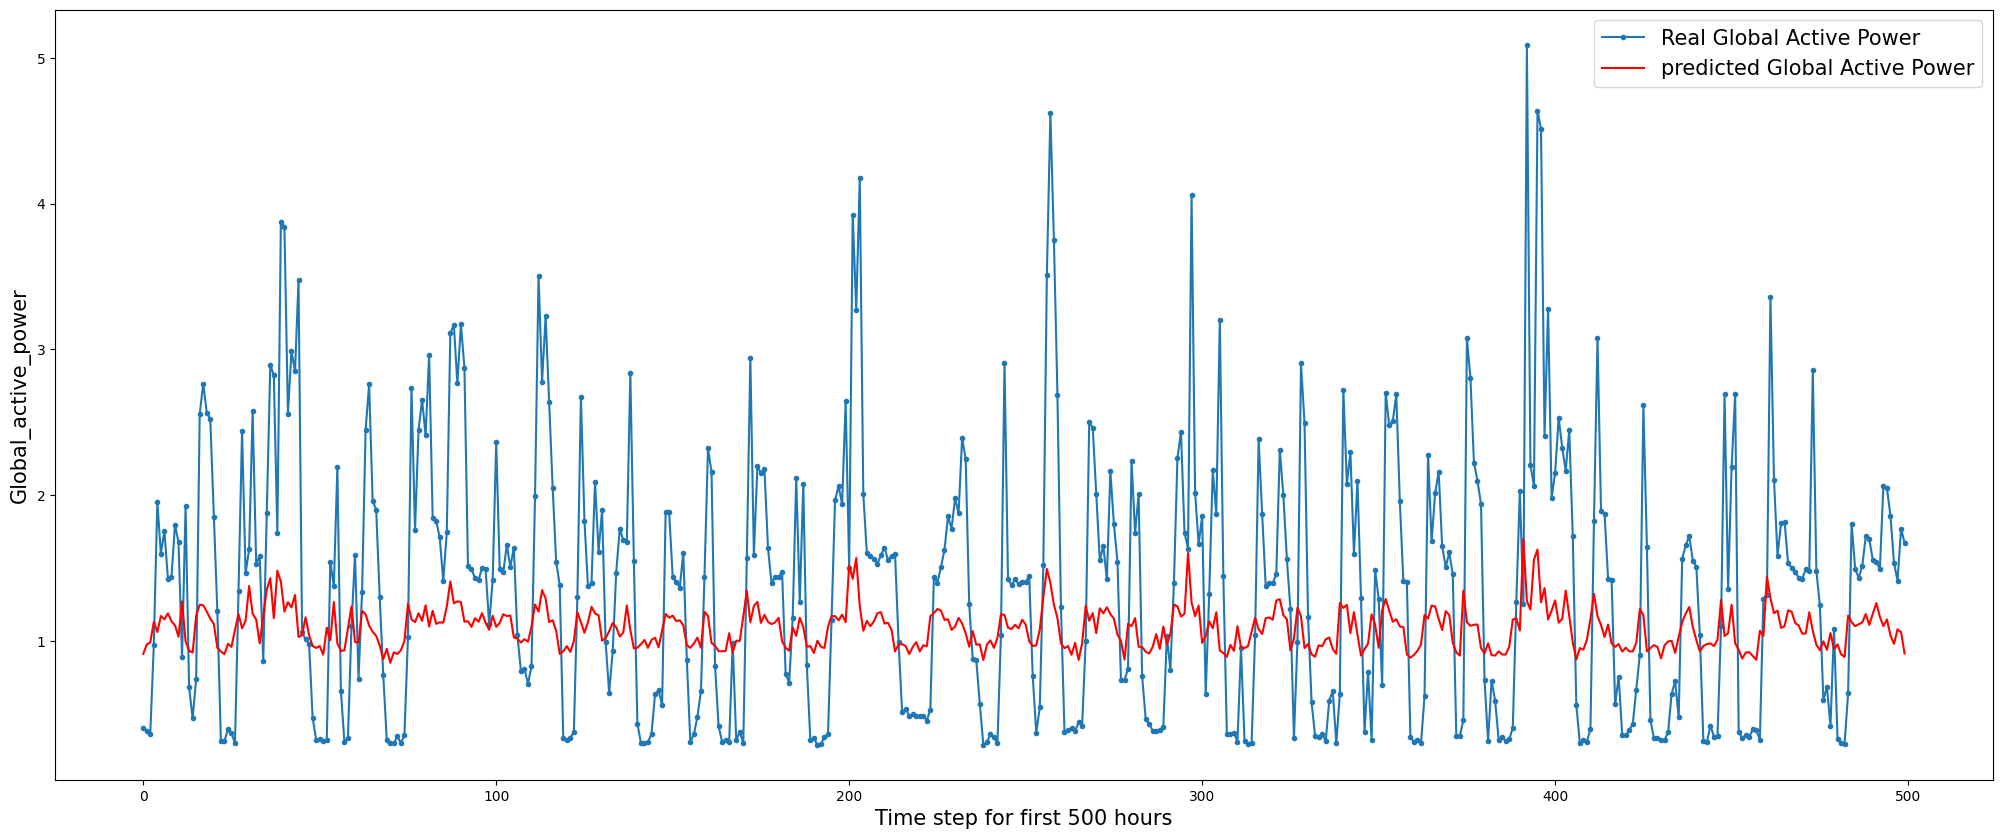

In [200]:
print(inv_y.shape)
print(inv_yhat.shape)
comp = pd.DataFrame({"Real_Global_Active_power": inv_y,
                    "Predicted_Global_Active_power": inv_yhat})

aa = [x for x in range(500)]
plt.figure(figsize=(25, 10))
plt.plot(aa, inv_y[:500], marker='.', label="Real Global Active Power")
plt.plot(aa, inv_yhat[:500], 'r', label="predicted Global Active Power")
plt.ylabel(df.columns[0], size=15)
plt.xlabel('Time step for first 500 hours', size=15)
plt.legend(fontsize=15)
plt.show()


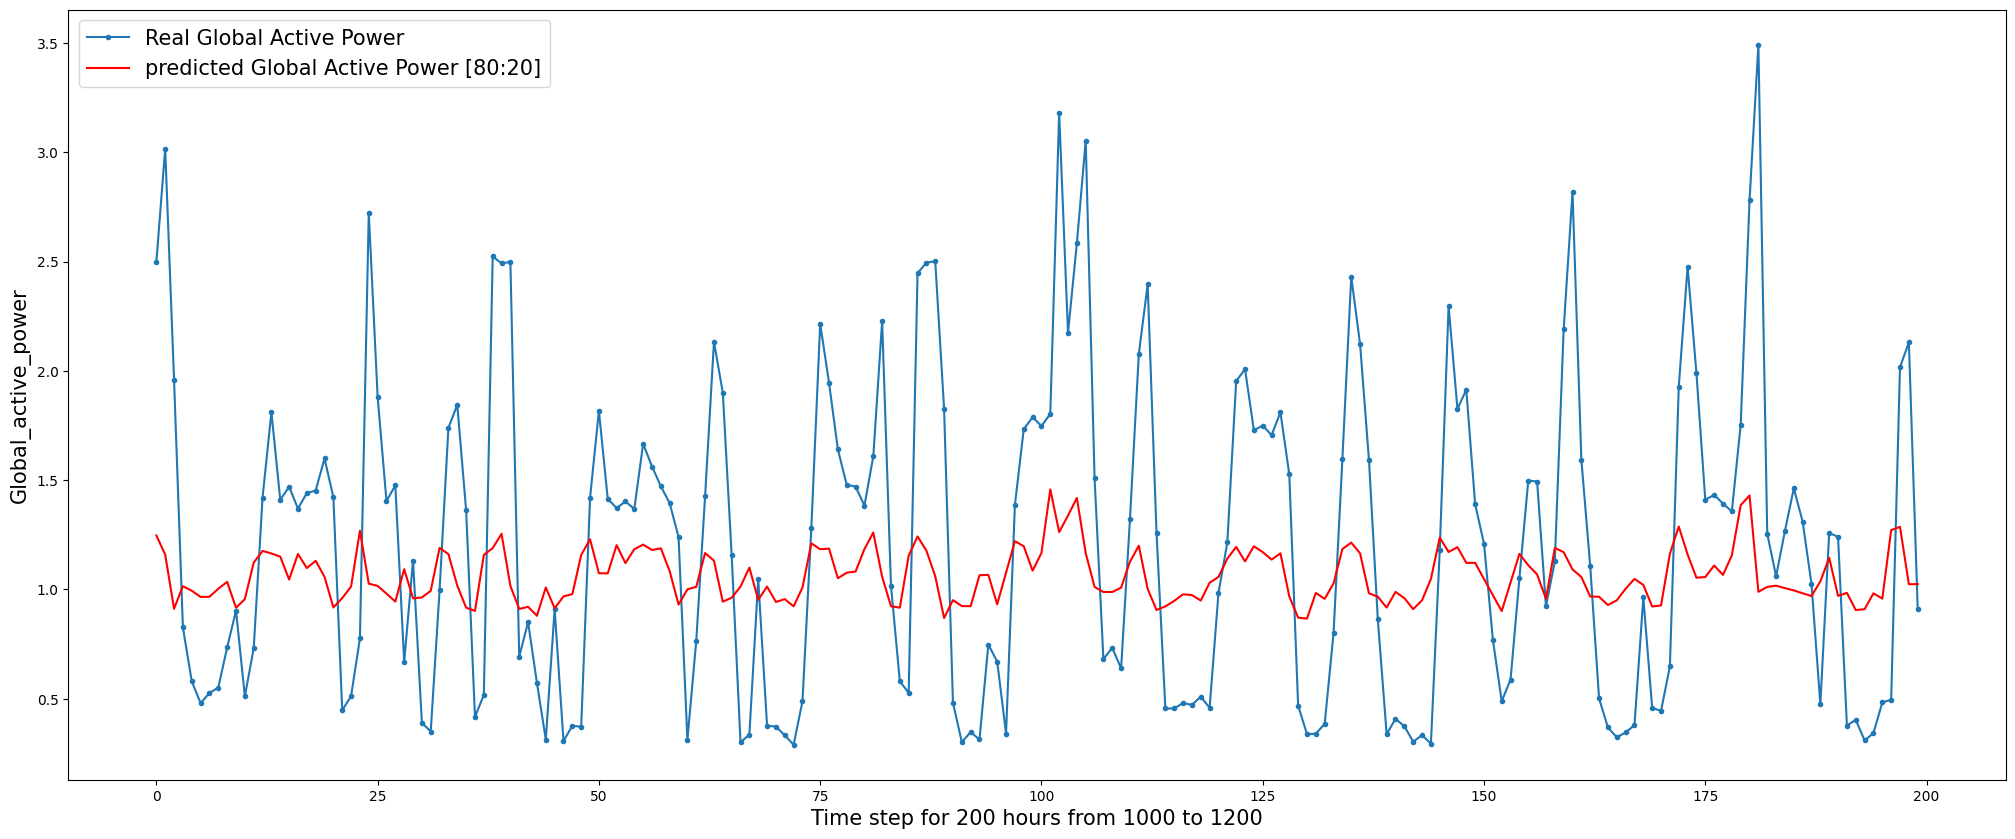

In [201]:
aa = [x for x in range(200)]
plt.figure(figsize=(25, 10))
plt.plot(aa, inv_y[1000:1200], marker='.', label="Real Global Active Power")
plt.plot(aa, inv_yhat[1000:1200], 'r', label="predicted Global Active Power [80:20]")
plt.ylabel(power_series_df.columns[0], size=15)
plt.xlabel('Time step for 200 hours from 1000 to 1200', size=15)
plt.legend(fontsize=15)
plt.show()


In [202]:
# Data spliting into train and test data series.80:20
train_x_70, test_x_30, train_y_70, test_y_30 = split_train_test_data(values = reframed.values, split_ratio = 0.7)

train_x=>torch.Size([23911, 1, 7]), test_x=>torch.Size([10248, 1, 7])
train_y=>torch.Size([23911]), test_y=>torch.Size([10248])


In [203]:
# Define the loss function and optimizer
# Initialize the model
model_70_30 = LSTMModel(input_size=train_x.shape[2], hidden_size=100, output_size=1)

print(model_70_30)
criterion_70_30 = nn.MSELoss()
optimizer_70_30 = optim.Adam(model_70_30.parameters(),lr= 0.0001)

# no of epochs 
epoch = 200

# Train the model
loss_list_70_30 = []
for epoch in range(epoch):
    optimizer_70_30.zero_grad()
    output = model_70_30(train_x_70)
    train_loss = criterion_70_30(output.squeeze(), train_y_70)
    train_loss.backward()
    optimizer_70_30.step()

    # Evaluate the model on the test data every 10 epochs
    with torch.no_grad():
        test_output = model_70_30(test_x_30.float())
        test_loss = criterion_70_30(test_output.squeeze(), test_y_30)
        if epoch % 10 == 0:
            print(
                f"Epoch {epoch + 10}, Train Loss: {train_loss.item():.6f}, Test Loss: {test_loss.item():.6f}")
    loss_list_70_30.append([train_loss.item(), test_loss.item()])
  

LSTMModel(
  (lstm): LSTM(7, 100, batch_first=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)
Epoch 10, Train Loss: 0.044415, Test Loss: 0.040562
Epoch 20, Train Loss: 0.042035, Test Loss: 0.038109
Epoch 30, Train Loss: 0.039784, Test Loss: 0.035829
Epoch 40, Train Loss: 0.037639, Test Loss: 0.033644
Epoch 50, Train Loss: 0.035642, Test Loss: 0.031612
Epoch 60, Train Loss: 0.033747, Test Loss: 0.029720
Epoch 70, Train Loss: 0.032030, Test Loss: 0.027921
Epoch 80, Train Loss: 0.030361, Test Loss: 0.026232
Epoch 90, Train Loss: 0.028857, Test Loss: 0.024730
Epoch 100, Train Loss: 0.027443, Test Loss: 0.023309
Epoch 110, Train Loss: 0.026128, Test Loss: 0.021987
Epoch 120, Train Loss: 0.024916, Test Loss: 0.020711
Epoch 130, Train Loss: 0.023811, Test Loss: 0.019630
Epoch 140, Train Loss: 0.022782, Test Loss: 0.018619
Epoch 150, Train Loss: 0.021815, Test Loss: 0.017724
Epoch 160, Train Loss: 0.021011, Test Loss: 0.016870
Epoch

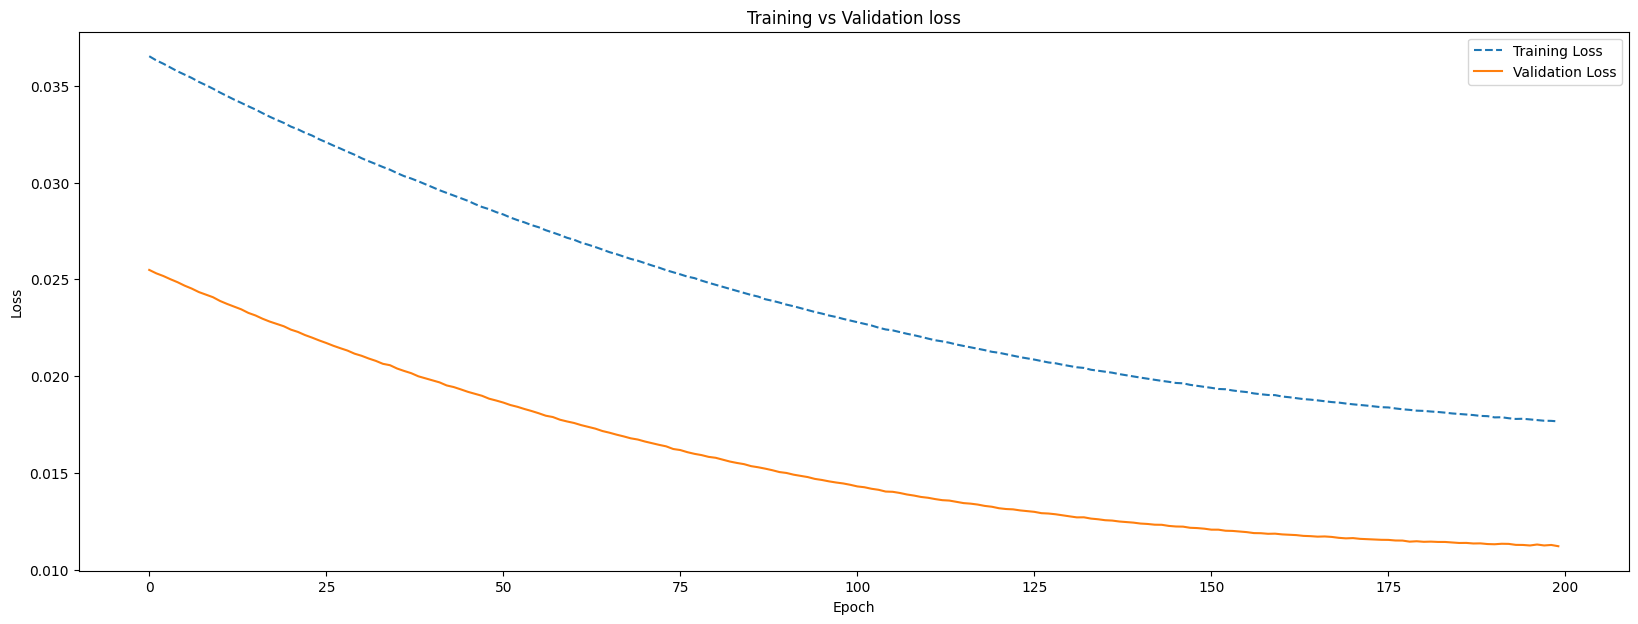

In [204]:
# Plot the loss history
plot_training_graphs(np.array(loss_list))

In [205]:
size = df_resample.shape[1]

# Prediction test
yhat_30 = model.predict(test_x_30)
test_x_30 = test_x_30.reshape((test_x_30.shape[0], size))

# invert scaling for prediction
inv_yhat_new_30 = np.concatenate((yhat_30, test_x_30[:, 1-size:]), axis=1)
inv_yhat_new_30 = scaler.inverse_transform(inv_yhat_new_30)
inv_yhat_new_30 = inv_yhat_new_30[:, 0]

# invert scaling for actual
test_y_30 = test_y_30.reshape((len(test_y_30), 1))
inv_y_30 = np.concatenate((test_y_30, test_x_30[:, 1-size:]), axis=1)
inv_y_30 = scaler.inverse_transform(inv_y_30)
inv_y_30 = inv_y_30[:, 0]

# calculate RMSE
rmse_30 = np.sqrt(mean_squared_error(inv_y_30, inv_yhat_new_30))
print('Test RMSE: %.3f' % rmse_30)

Test RMSE: 0.751


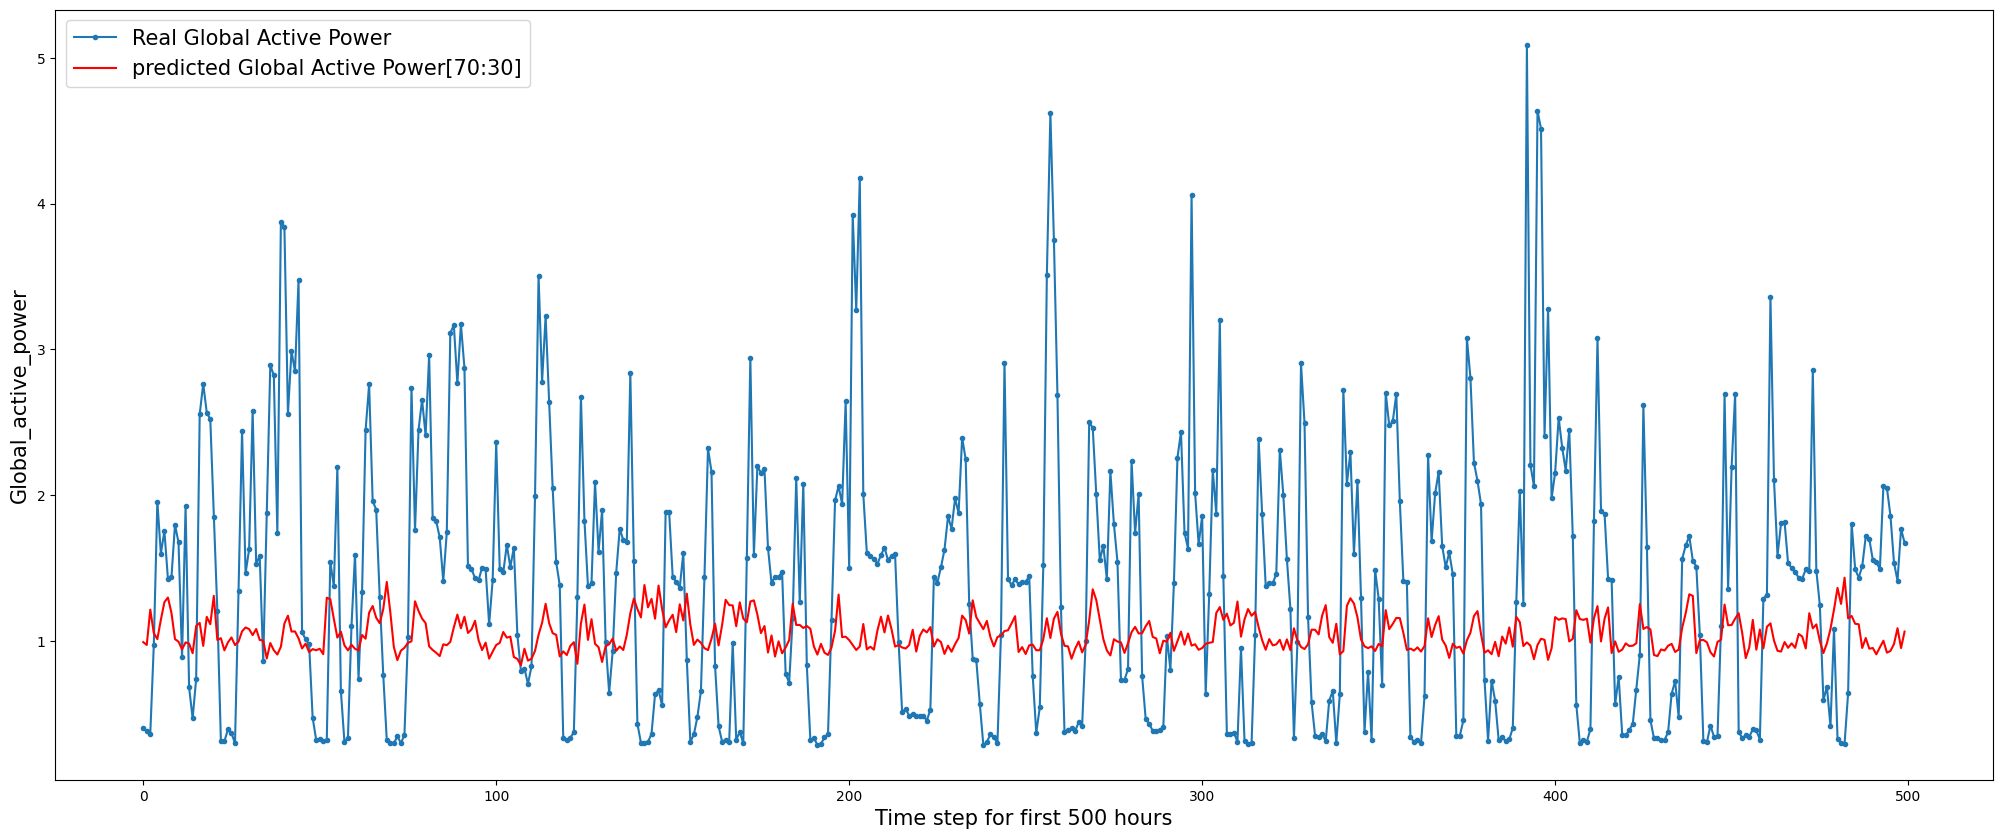

In [206]:
aa = [x for x in range(500)]
plt.figure(figsize=(25, 10))
plt.plot(aa, inv_y[:500], marker='.', label="Real Global Active Power")
plt.plot(aa, inv_yhat_new_30[:500], 'r',
         label="predicted Global Active Power[70:30]")
plt.ylabel(df.columns[0], size=15)
plt.xlabel('Time step for first 500 hours', size=15)
plt.legend(fontsize=15)
plt.show()


ValueError: x and y must have same first dimension, but have shapes (1000,) and (0,)

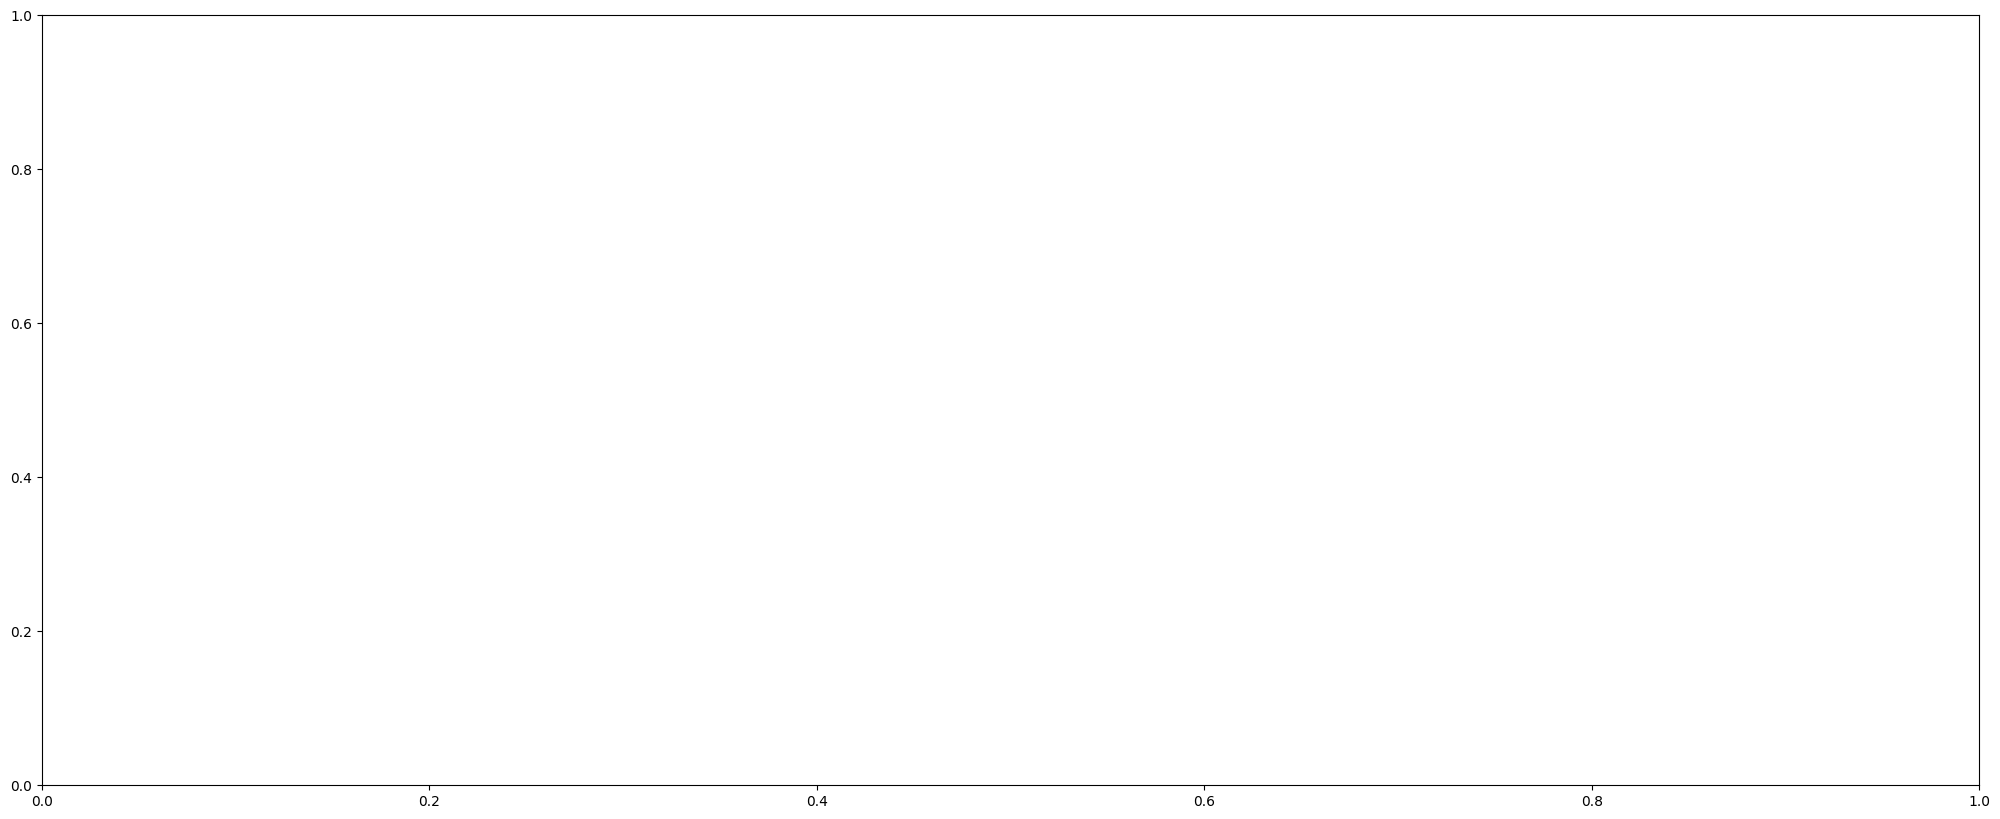

In [207]:
comp['Predicted Global Active Power[70:30]'] = inv_yhat_new[0:6832]
aa = [x for x in range(1000)]
plt.figure(figsize=(25, 10))
plt.plot(aa, inv_y[8000:9000], marker='.', label="Real Global Active Power")
plt.plot(aa, inv_yhat_new[8000:9000], 'r',
         label="predicted Global Active Powern[70:30]")
plt.ylabel(df.columns[0], size=15)
plt.xlabel('Time step for 1000 hours from 25,000 to 26,000', size=15)
plt.legend(fontsize=15)
plt.show()


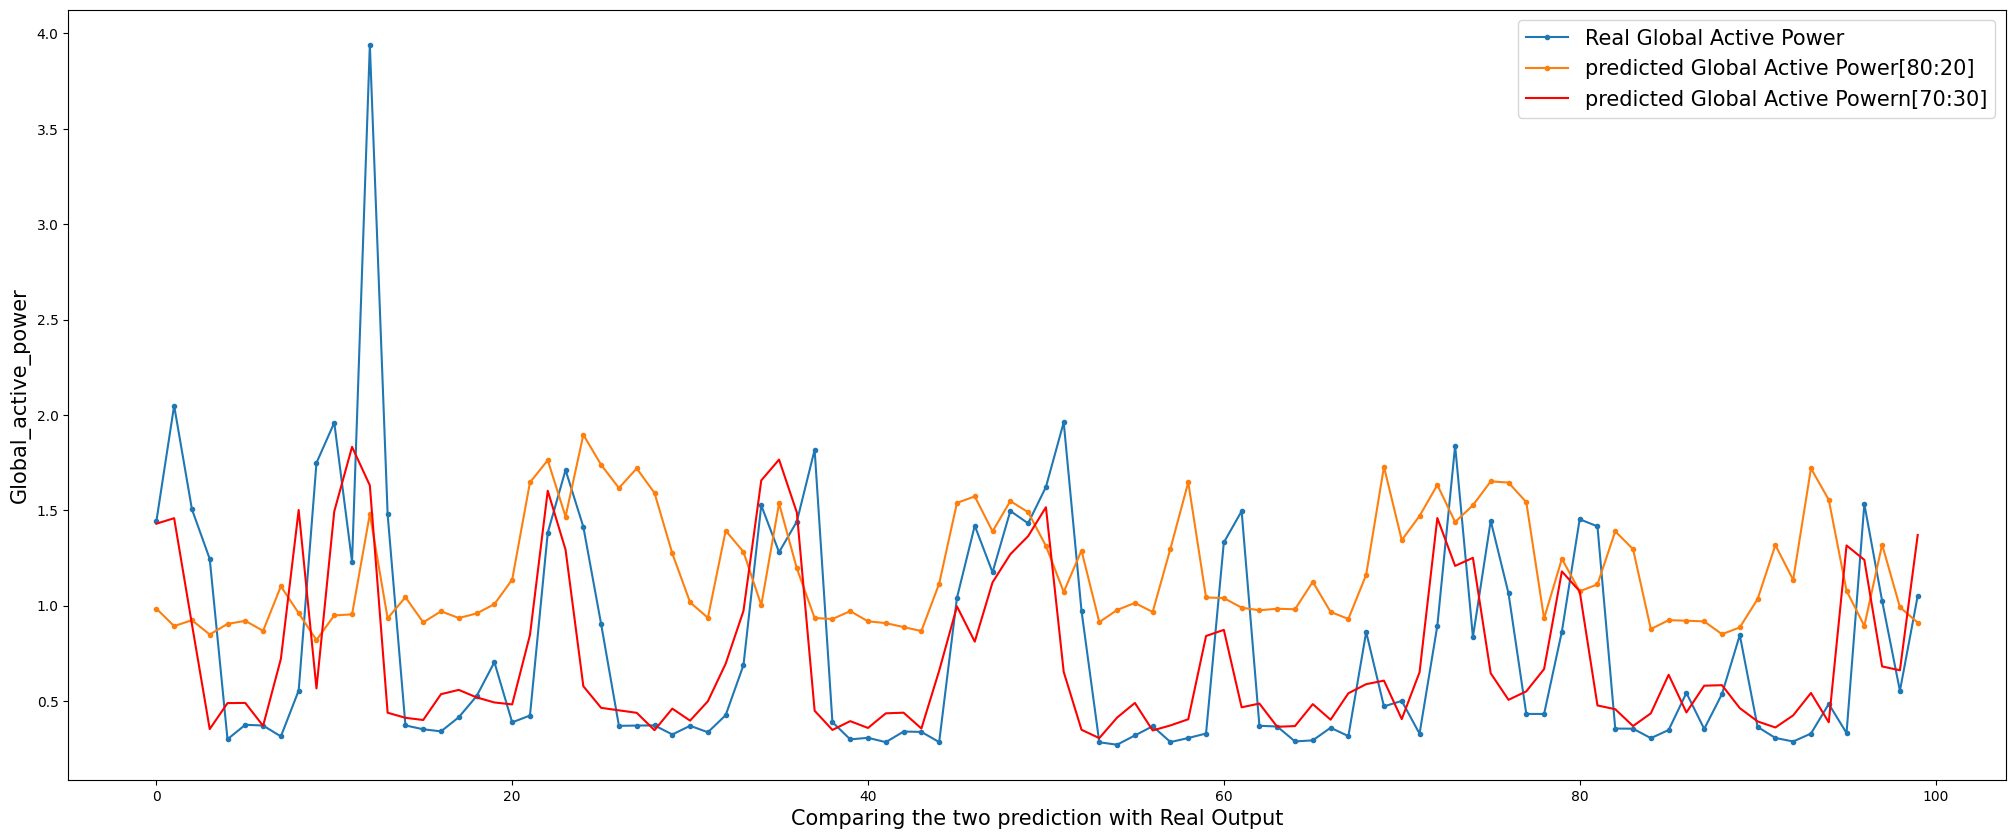

In [ ]:
comp.shape
aa = [x for x in range(100)]
plt.figure(figsize=(25, 10))
plt.plot(aa, inv_y[6700:6800], marker='.', label="Real Global Active Power")
plt.plot(aa, inv_yhat[6700:6800], marker='.',
         label="predicted Global Active Power[80:20]")
plt.plot(aa, inv_yhat_new[6700:6800], 'r',
         label="predicted Global Active Powern[70:30]")
plt.ylabel(df.columns[0], size=15)
plt.xlabel('Comparing the two prediction with Real Output', size=15)
plt.legend(fontsize=15)
plt.show()


In [ ]:
comp


,Real_Global_Active_power,Predicted_Global_Active_power,Predicted Global Active Power[70:30]
0,0.404167,1.088960,1.285764
1,0.378000,1.073680,0.801072
2,0.362400,1.191523,1.669873
3,0.971767,1.570205,1.295942
4,1.954967,1.404128,0.967157
...,...,...,...
6827,1.067933,1.232729,1.385093
6828,1.725900,1.050292,1.367911
6829,1.573467,1.098613,0.842030
6830,1.659333,0.968808,1.004988
